In [2]:
import pandas
import pandas as pd
from xgboost import XGBRegressor


data = pandas.read_csv('ssq.csv')
# 选取后100条作为测试集
train = data[:-100]
test = data[-100:]
print(data.head)

<bound method NDFrame.head of           id  red1  red2  red3  red4  red5  red6  blue  \
0    2016119     9    32    30    21    19    31     4   
1    2016120     6    21    28    25     2     5     9   
2    2016121    28    23     2    10    25     3     9   
3    2016122    15    28    23    29    22    24     8   
4    2016123     9    20    12    27    14     7    16   
..       ...   ...   ...   ...   ...   ...   ...   ...   
995  2023069    26    17    20    21    14    12     2   
996  2023070    32    31     3    25    33     5     4   
997  2023071    24    15    12    19     5    26     6   
998  2023072     2    10    24    33     6    25     9   
999  2023073    16    15    32     1    25     3    10   

                                     firstPrizeAddress    OpenTime  SaleMoney  
0                            河北1注,内蒙古1注,浙江1注,安徽1注,共4注。  2016-10-11  302415052  
1                  北京1注,内蒙古1注,辽宁1注,上海1注,湖北1注,云南1注,共6注。  2016-10-13  309329228  
2                        吉林1注,江苏1

In [3]:
# 选取特征
X_columns = ['id']
y_column = ['red1','red2','red3','red4','red5','red6','blue']
X_train = train[X_columns]
y_train = train[y_column]
X_test = test[X_columns]
y_test = test[y_column]

In [4]:
model = XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [5]:
from sklearn.ensemble import RandomForestRegressor
model1 = RandomForestRegressor(random_state=100)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
print(y_pred1)
print(y_pred)

[[17.65 26.1  21.78 19.98 10.32 12.23  4.54]
 [17.65 26.1  21.78 19.98 10.32 12.23  4.54]
 [17.65 26.1  21.78 19.98 10.32 12.23  4.54]
 [17.65 26.1  21.78 19.98 10.32 12.23  4.54]
 [17.65 26.1  21.78 19.98 10.32 12.23  4.54]
 [17.65 26.1  21.78 19.98 10.32 12.23  4.54]
 [17.65 26.1  21.78 19.98 10.32 12.23  4.54]
 [17.65 26.1  21.78 19.98 10.32 12.23  4.54]
 [17.65 26.1  21.78 19.98 10.32 12.23  4.54]
 [17.65 26.1  21.78 19.98 10.32 12.23  4.54]
 [17.65 26.1  21.78 19.98 10.32 12.23  4.54]
 [17.65 26.1  21.78 19.98 10.32 12.23  4.54]
 [17.65 26.1  21.78 19.98 10.32 12.23  4.54]
 [17.65 26.1  21.78 19.98 10.32 12.23  4.54]
 [17.65 26.1  21.78 19.98 10.32 12.23  4.54]
 [17.65 26.1  21.78 19.98 10.32 12.23  4.54]
 [17.65 26.1  21.78 19.98 10.32 12.23  4.54]
 [17.65 26.1  21.78 19.98 10.32 12.23  4.54]
 [17.65 26.1  21.78 19.98 10.32 12.23  4.54]
 [17.65 26.1  21.78 19.98 10.32 12.23  4.54]
 [17.65 26.1  21.78 19.98 10.32 12.23  4.54]
 [17.65 26.1  21.78 19.98 10.32 12.23  4.54]
 [17.65 26

In [6]:
def get_score(y_pred, y_test):
    red_test = y_test[:6]
    blue_test = y_test[6]
    red_pred = y_pred[:6]
    blue_pred = y_pred[6]
    blue_pred = int(round(blue_pred))
    # print(red_pred, blue_pred, red_test, blue_test)
    red = 0
    blue = 0
    for i in red_pred:
        i = int(round(i))
        if i in red_test:
            red += 1
    if blue_pred == blue_test:
        blue = 1
    if red == 6 and blue == 1:
        return 4000000
    elif red == 6:
        return 80000
    elif red == 5 and blue == 1:
        return 2998
    elif red == 5 or (red == 4 and blue == 1):
        return 198
    elif red == 4 or (red == 3 and blue == 1):
        return 8
    elif blue == 1:
        return 3
    else:
        return -2


In [7]:
TotScore = 0
for i in range(100):
    t = get_score(y_pred1[i], y_test.iloc[i])
    TotScore += t 
print(TotScore)


-160


In [8]:
TotScore = 0
for i in range(100):
    TotScore += get_score(y_pred[i], list(y_test.iloc[i]))
print(TotScore)

-160


In [9]:
import random
TotScore = 0 
times = 100
for i in range(times):
    for i in range(100):
        y_pred2 = random.sample(range(1, 34), 6)
        y_pred2.append(random.randint(1, 16))
        # print(y_pred2)
        t = get_score(y_pred2, list(y_test.iloc[i]))
        TotScore += t
print(TotScore/times)

-156.7


In [10]:
y_train1 = pd.DataFrame()
for i in range(1,34):
    y_train1['red'+str(i)] = 0
for i in range(1,17):
    y_train1['blue'+str(i)] = 0
# print(y_test1.columns)
y_train1.shape

(0, 49)

In [11]:
for i in range(900):
    # print(y_train.iloc[i])
    y_train1.loc[i]=0
    y_train1.loc[i]['red{}'.format(y_train.iloc[i][0])] = 1
    y_train1.loc[i]['red{}'.format(y_train.iloc[i][1])] = 1
    y_train1.loc[i]['red{}'.format(y_train.iloc[i][2])] = 1
    y_train1.loc[i]['red{}'.format(y_train.iloc[i][3])] = 1
    y_train1.loc[i]['red{}'.format(y_train.iloc[i][4])] = 1
    y_train1.loc[i]['red{}'.format(y_train.iloc[i][5])] = 1
    y_train1.loc[i]['blue{}'.format(y_train.iloc[i][6])] = 1
y_train1

,red1,red2,red3,red4,red5,red6,red7,red8,red9,red10,...,blue7,blue8,blue9,blue10,blue11,blue12,blue13,blue14,blue15,blue16
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
896,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
897,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
898,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
y_test1 = pd.DataFrame()
for i in range(1,34):
    y_test1['red'+str(i)] = 0
for i in range(1,17):
    y_test1['blue'+str(i)] = 0
# print(y_test1.columns)
y_test1.shape

(0, 49)

In [13]:
for i in range(100):
    # print(y_train.iloc[i])
    y_test1.loc[i]=0
    y_test1.loc[i]['red{}'.format(y_test.iloc[i][0])] = 1
    y_test1.loc[i]['red{}'.format(y_test.iloc[i][1])] = 1
    y_test1.loc[i]['red{}'.format(y_test.iloc[i][2])] = 1
    y_test1.loc[i]['red{}'.format(y_test.iloc[i][3])] = 1
    y_test1.loc[i]['red{}'.format(y_test.iloc[i][4])] = 1
    y_test1.loc[i]['red{}'.format(y_test.iloc[i][5])] = 1
    y_test1.loc[i]['blue{}'.format(y_test.iloc[i][6])] = 1
y_test1

,red1,red2,red3,red4,red5,red6,red7,red8,red9,red10,...,blue7,blue8,blue9,blue10,blue11,blue12,blue13,blue14,blue15,blue16
0,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,1,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [14]:
model1 = XGBRegressor()

model1.fit(X_train, y_train1)
y_pred1 = model1.predict(X_test)
y_pred1

array([[0.02129433, 0.02913084, 0.01204766, ..., 0.00211357, 0.00527087,
        0.00515523],
       [0.02129433, 0.02913084, 0.01204766, ..., 0.00211357, 0.00527087,
        0.00515523],
       [0.02129433, 0.02913084, 0.01204766, ..., 0.00211357, 0.00527087,
        0.00515523],
       ...,
       [0.02129433, 0.02913084, 0.01204766, ..., 0.00211357, 0.00527087,
        0.00515523],
       [0.02129433, 0.02913084, 0.01204766, ..., 0.00211357, 0.00527087,
        0.00515523],
       [0.02129433, 0.02913084, 0.01204766, ..., 0.00211357, 0.00527087,
        0.00515523]], dtype=float32)

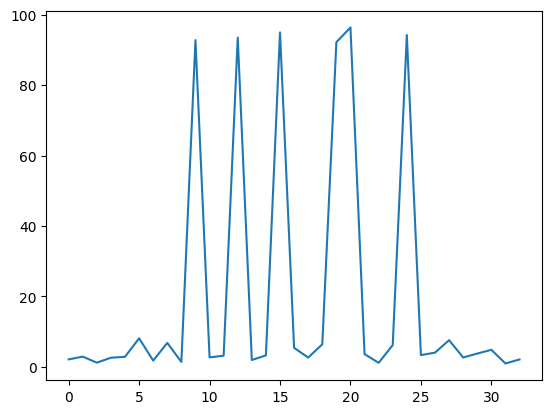

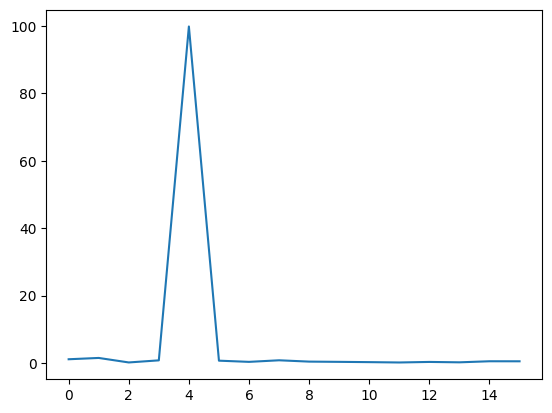

In [15]:
import matplotlib.pyplot as plt
plt.plot(y_pred1[0][:33]*100)
plt.show()
plt.plot(y_pred1[0][33:]*100)
plt.show()

In [16]:
model2 = RandomForestRegressor()
model2.fit(X_train, y_train1)
y_pred2 = model2.predict(X_test)
y_pred2

array([[0.  , 0.08, 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.08, 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.08, 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.08, 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.08, 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.08, 0.  , ..., 0.  , 0.  , 0.  ]])

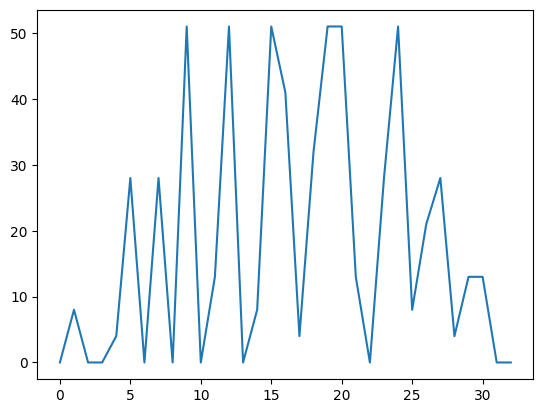

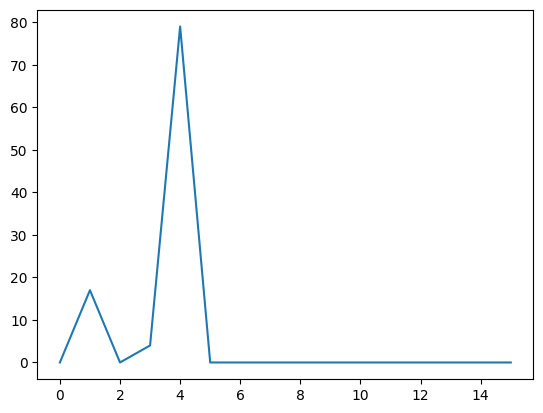

In [17]:
import matplotlib.pyplot as plt
plt.plot(y_pred2[0][:33]*100)
plt.show()
plt.plot(y_pred2[0][33:]*100)
plt.show()

In [18]:
print(y_test[-1:])

     red1  red2  red3  red4  red5  red6  blue
999    16    15    32     1    25     3    10


In [19]:
#用score的倒数作为loss function
def loss_function():


SyntaxError: unexpected EOF while parsing (4184124246.py, line 3)

In [ ]:
import catboost as cb
model3 = cb.CatBoostRegressor(eval_metric='RMSE')
model3.fit(X_train, y_train1)
y_pred3 = model3.predict(X_test)
y_pred3